In [1]:
import os
import sys
from datetime import datetime,timedelta
import json
import math
import numpy as np
import pandas as pd
import dateutil.parser
import dateutil.rrule
import nmc_met_io
import nmc_met_io.retrieve_cmadaas
import nmc_met_io.retrieve_cmadaas_history
import warnings
warnings.filterwarnings('ignore')

# 读取单个数值模式预报数据

In [2]:
# set retrieve parameters
dataCode = "NAFP_ANA_FTM_GRAPES_GFS_NEHE"    # 资料代码: 大气模式确定性预报产品
init_time = "2020072900"              # 起报时间: 
fcst_Ele = "TEM"
levelType = 1
fcastLevel = 0
validTime = 0

In [3]:
# retrieve data from CMADaaS
data = nmc_met_io.retrieve_cmadaas.cmadaas_model_grid(
    dataCode, init_time, validTime, fcst_Ele, fcastLevel, levelType, 
                          varname='temperature', units='Degree', scale_off=[1.0, -273.15],
                          levattrs={'long_name':'height_above_ground', 'units':'m', '_CoordinateAxisType':'Height'},
    cache=False
    
)

In [4]:
data

<xarray.Dataset> Size: 4MB
Dimensions:                  (time: 1, lat: 720, lon: 1441)
Coordinates:
  * time                     (time) datetime64[ms] 8B 2020-07-29
  * lat                      (lat) float64 6kB 89.94 89.81 ... 0.1875 0.0625
  * lon                      (lon) float64 12kB 0.0 0.125 0.25 ... 179.9 180.0
    forecast_reference_time  datetime64[ms] 8B 2020-07-29
    forecast_period          (time) float64 8B 0.0
Data variables:
    temperature              (time, lat, lon) float32 4MB -272.7 ... -272.7
Attributes:
    Conventions:  CF-1.6
    Origin:       CIMISS Server by MUSIC API

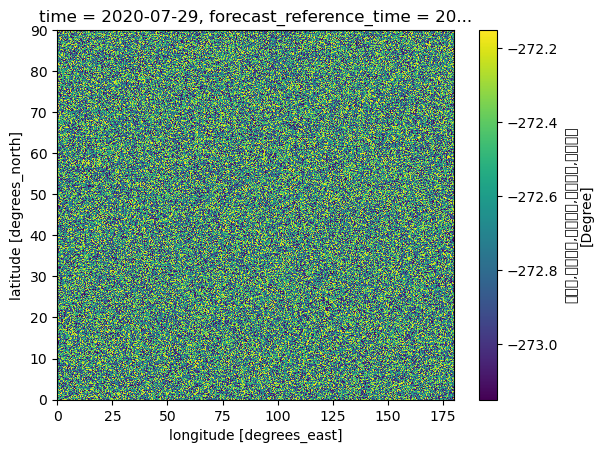

In [5]:
data.temperature[0].plot()